# Emotion Detection of Text (classification of text)

<ul>
    <li>Text classification</li>
    <li>Sentiment Analysis</li>
</ul>


In [2]:
#Packages
import pandas as pd
import numpy as np


In [3]:
#Package - Data Visulisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Install neattext (text cleaning)
#pip install neattext

In [32]:
#Text Cleaning
import neattext.functions as nfx

In [4]:
#Load Dataset
ds = pd.read_csv("data/emotion_dataset_2.csv")

In [ ]:
#Preview dataset
ds.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [39]:
#Shape of dataset
ds.shape

(34792, 4)

In [41]:
#Datatypes
ds.dtypes

Unnamed: 0     int64
Emotion       object
Text          object
Clean_Text    object
dtype: object

In [42]:
#Check is missing values?
ds.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [43]:
#Value Count of Emotions
ds['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:>

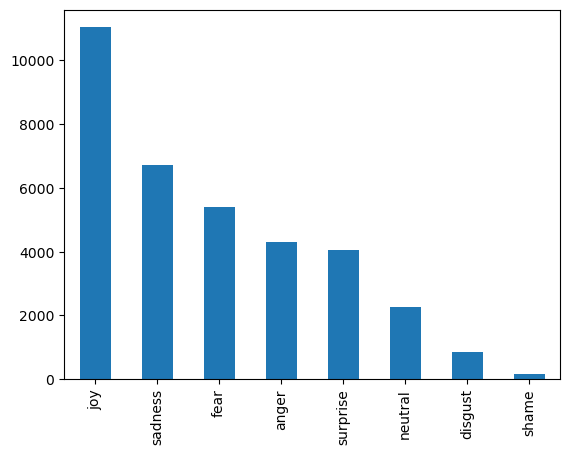

In [44]:
#Value Count of Emotions as plot
ds['Emotion'].value_counts().plot(kind='bar')

In [ ]:
#Using Seaborn to plot (OLD METHOD)
sns.countplot(ds['Emotion'])

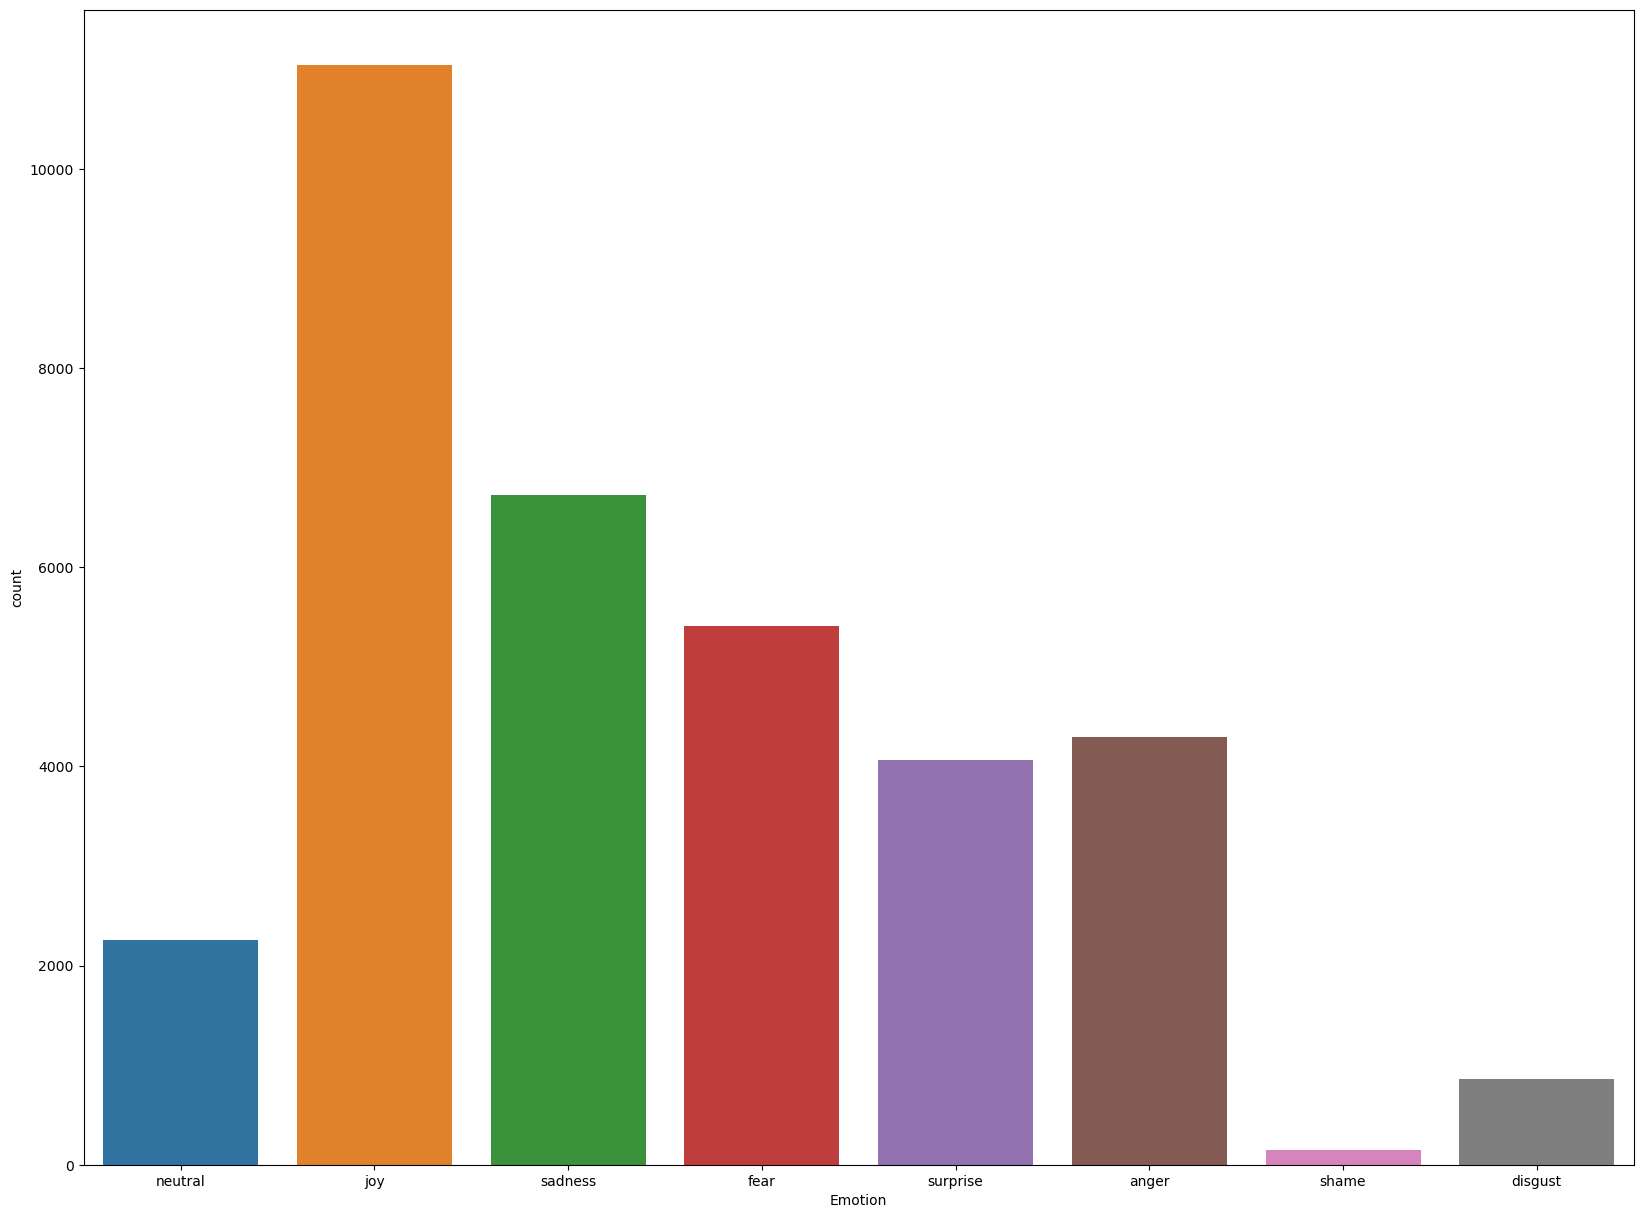

In [57]:
#Using Seaborn to plot (NEW METHOD)
plt.figure(figsize=(20,15))
sns.countplot(x = 'Emotion', data = ds)
plt.show()

From the above I noticed...
<ul> 
    <li>dataset was very imbalanced (shame and disgust have way less data than other emotions)</li>
    <li>multi class classification</li>
</ul>

# Exploration 
+ Text Cleaning
+ Sentiment Analysis
    - Sentiment Analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.
+ Keyword Extraction
    - Keywords for each emotion
    - Wordcloud 

In [11]:
# Sentiment Analysis
from textblob import TextBlob

In [12]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result="Positive"
    elif sentiment < 0:
        result="Negative"
    elif sentiment == 0 :
        result = "Neutral"
    return result
#polarity simply means means emotions expressed in a sentence.

In [13]:
#Test get_sentiment function
get_sentiment("I love coding")

'Positive'

In [14]:
ds['Sentiment'] = ds['Text'].apply(get_sentiment)

In [66]:
ds.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,Neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,Negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral


In [67]:
#Compare our Emotion vs Sentiment
ds.groupby(['Emotion', 'Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

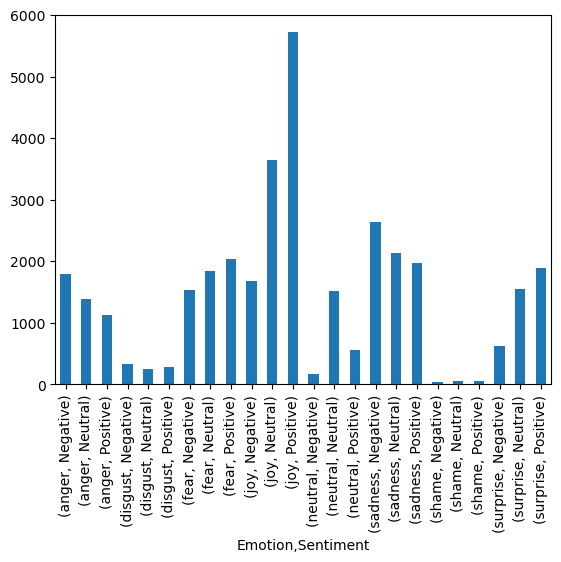

In [68]:
#First method : Using Matplotlib
#Compare Emotion vs Sentiment
ds.groupby(['Emotion', 'Sentiment']).size().plot(kind="bar")

In [19]:
# Using Seaborn
sns.factorplot
sns.catplot


<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x0000020BC32971F0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

E:\Anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Anaconda\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


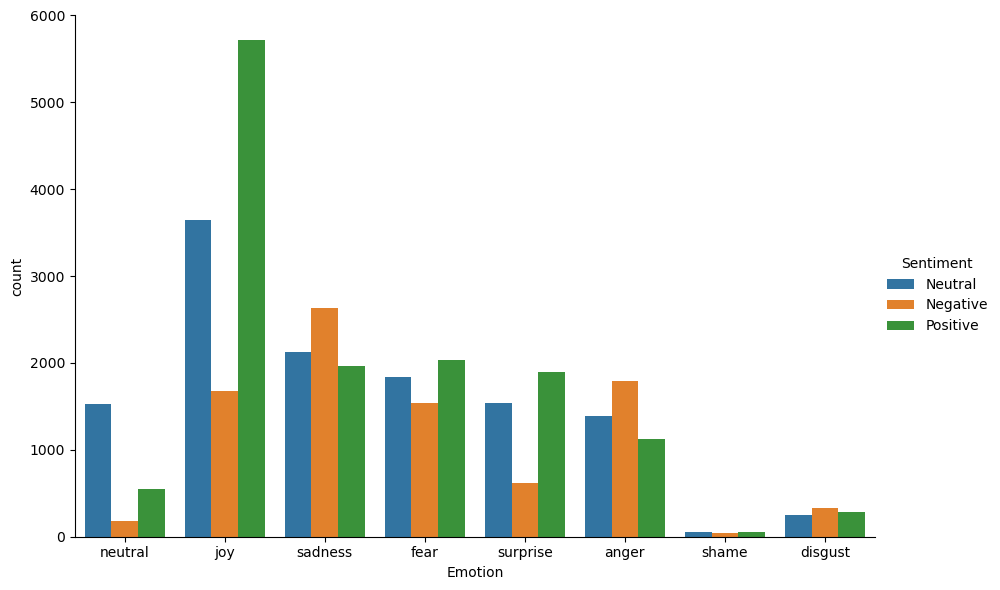

In [28]:
sns.factorplot(x='Emotion', hue='Sentiment', data=ds, kind='count', size=6, aspect=1.5)
plt.show()

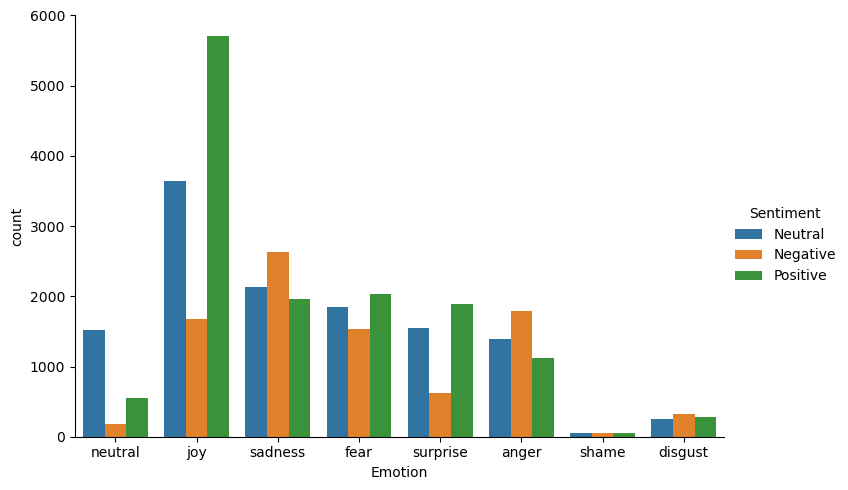

In [29]:
sns.catplot(x='Emotion', hue='Sentiment', data=ds, kind='count', aspect = 1.5)
plt.show(sns)

# Text Cleaning
+ Remove Noise
    - stopwords
    - special characters (punctuations, emojis etc)

<p>I will use NeatText (nfx) for cleaning the data and tex preprocessing!</p>


In [33]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [35]:
ds.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,Neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,Negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral


### This dataset given already had cleaned data which was inconvenient for me as I wanted to clean it.
### But below are the functions I would call to clean my dataset.
+ ds['Clean_Text'] = ds['Text'].apply(nfx.remove_stopwords)
+ ds['Clean_Text'] = ds['Clean_Text'].apply(nfx.remove_userhandles)
+ ds['Clean_Text'] = ds['Clean_Text'].apply(nfx.remove_punctuations)

In [38]:

#we can see the outcome of our text after it has been cleaned below.
ds[['Text', 'Clean_Text']]

,Text,Clean_Text
0,Why ?,NaN
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


## Key word extraction
+ Extract most common words per particular class (emotion)



In [41]:
from collections import Counter

In [72]:
#Extract top 50 keywords (hence parameter by default is 50)
#Function returns a dict
def extract_keywords(text, num=50):
    tokens = [ token for token in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [64]:
# List of emotions
emotion_list = ds['Emotion'].unique().tolist()
print(emotion_list)

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']


In [65]:
#joy list
joy_list = ds[ds['Emotion'] == "joy"]['Clean_Text'].to_list()
joy_list

['Sage Act upgrade list tommorow',
 'eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness ',
 '  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang',
 'life  Leopold truly happy : hopes prayers beloved son come fruition ',
 'feeling fail french #fuckfrench',
 'GoodLet  ',
 'fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile',
 'terribly ecstatic dangerous thing ',
 'selected study university',
 'Yeah  ’ ages  ',
 'passed BA exams class results',
 'heard selected fot year university Zambia form Chikola secondary school',
 'Welp time study days',
 'Heading campus rain grad photos',
 'feeling awesome ',
 '  brings  Ive bought Christmas presents trawl loads shops :)',
 'shit pants Pure 100% gravy',
 'life  Leopold

In [70]:
#joy document
joy_docx = ' '.join(str(sentences) for sentences in joy_list)
joy_docx


'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

<p>In the above I got the list of only the emotion 'joy' and I am creating a document where I connect all the text into one giant paragraph. 
<p>Now that we have a giant paragraph we can get keywords and use wordcloud to plot them out.

In [73]:
#Extract Keywords
#joy_keywords is a dict
joy_keywords = extract_keywords(joy_docx)
joy_keywords

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [80]:
# Plot
# 'token' is the name of the word shown above (in our dict aka the key)
def plot_most_common_words(keywords_dict, emotion_name):
    data_frame_01 = pd.DataFrame(keywords_dict.items(), columns=['token', 'count'])
    plt.figure(figsize=(20,10))
    plt.title("Chart showing most common keywords of emotion: {}".format(emotion_name))
    sns.barplot(x='token', y='count', data=data_frame_01)
    plt.xticks(rotation=45)
    plt.show(sns)
    

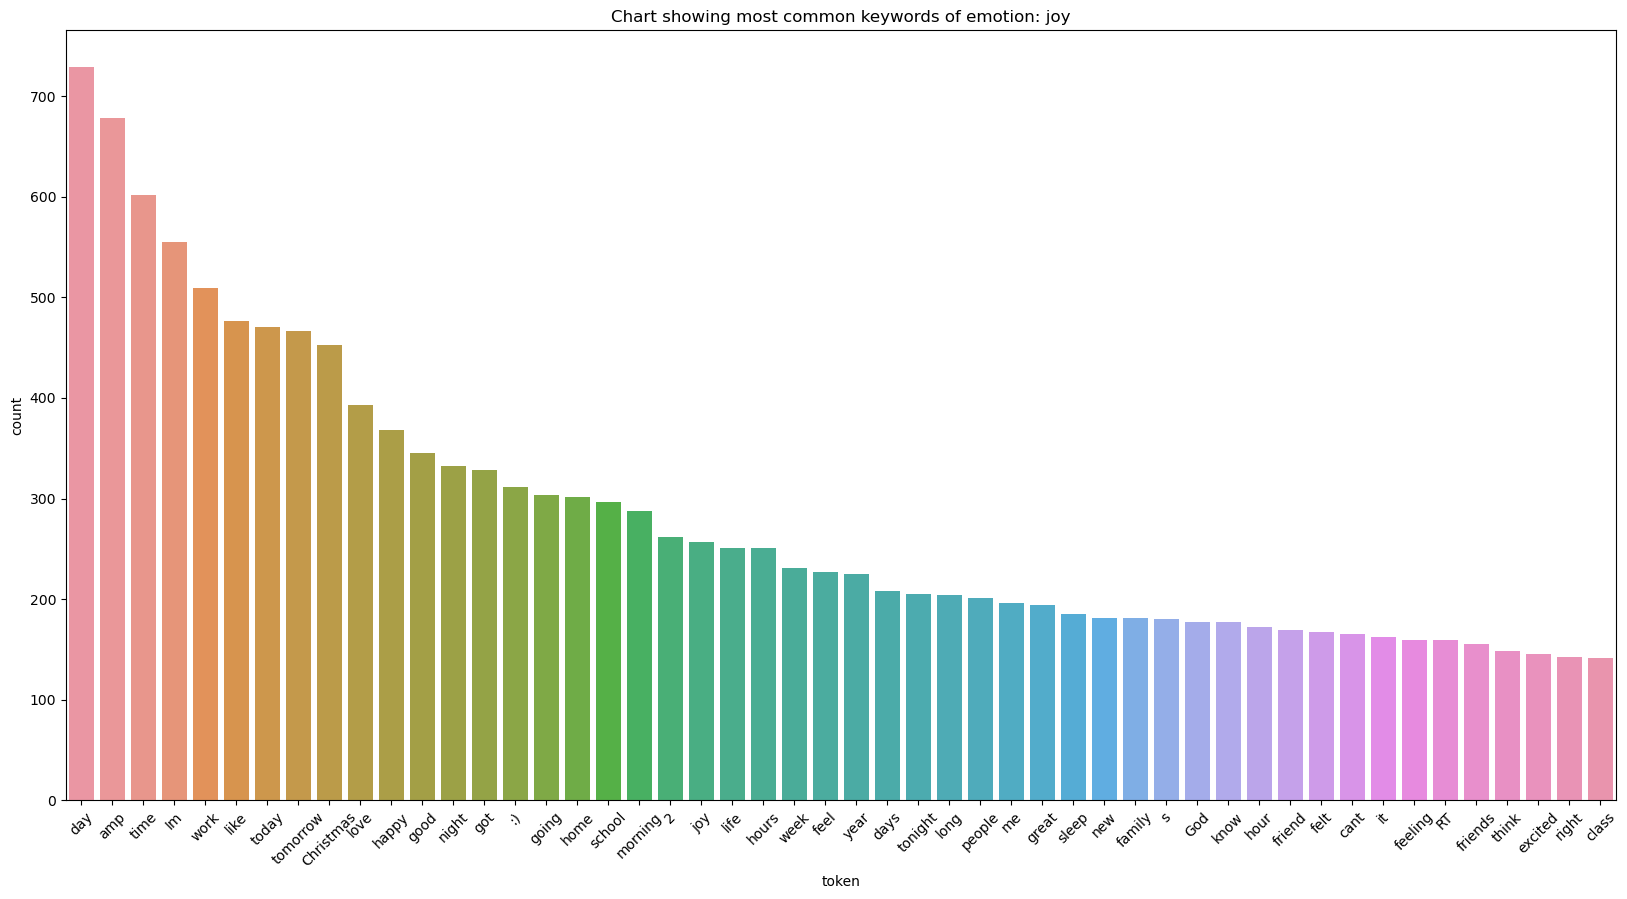

In [81]:
plot_most_common_words(joy_keywords, "joy")

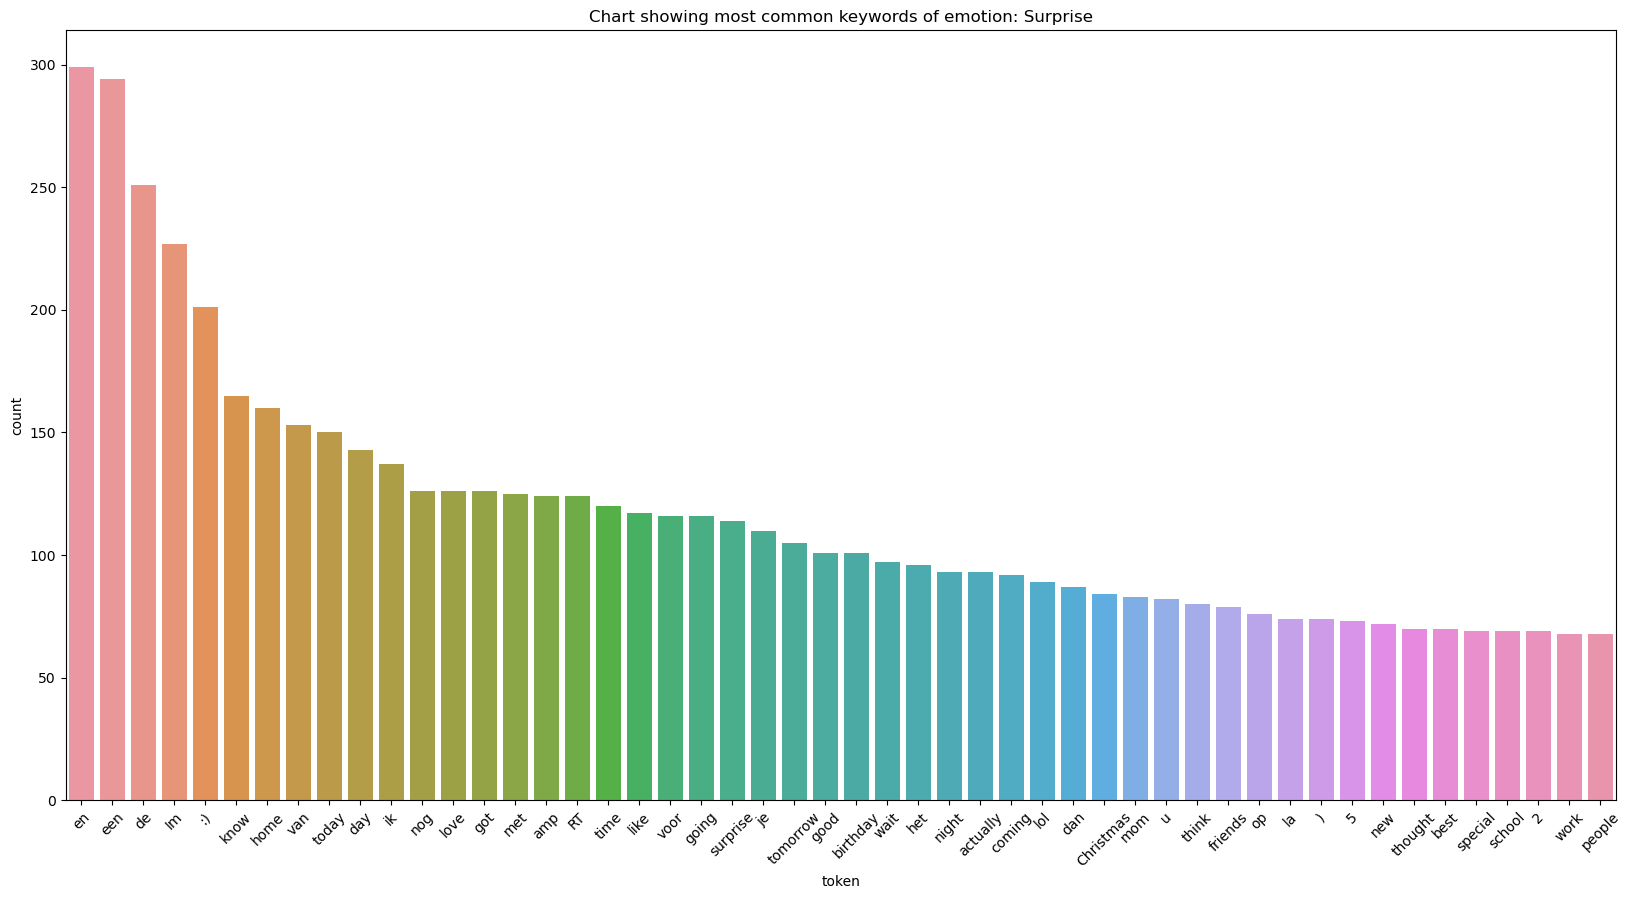

In [83]:
#Surprise list
surprise_list = ds[ds['Emotion'] == "surprise"]['Clean_Text'].to_list()
#joy document
surprise_docx = ' '.join(str(sentences) for sentences in surprise_list)
#Extract Keywords
#joy_keywords is a dict
surprise_keywords = extract_keywords(surprise_docx)

plot_most_common_words(surprise_keywords, "Surprise")


<h3> All the other emotions can be plotted like above! </h3>

In [85]:
# Word Cloud 
from wordcloud import WordCloud

In [91]:
def plot_wordcloud(docx):
    new_wordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(new_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

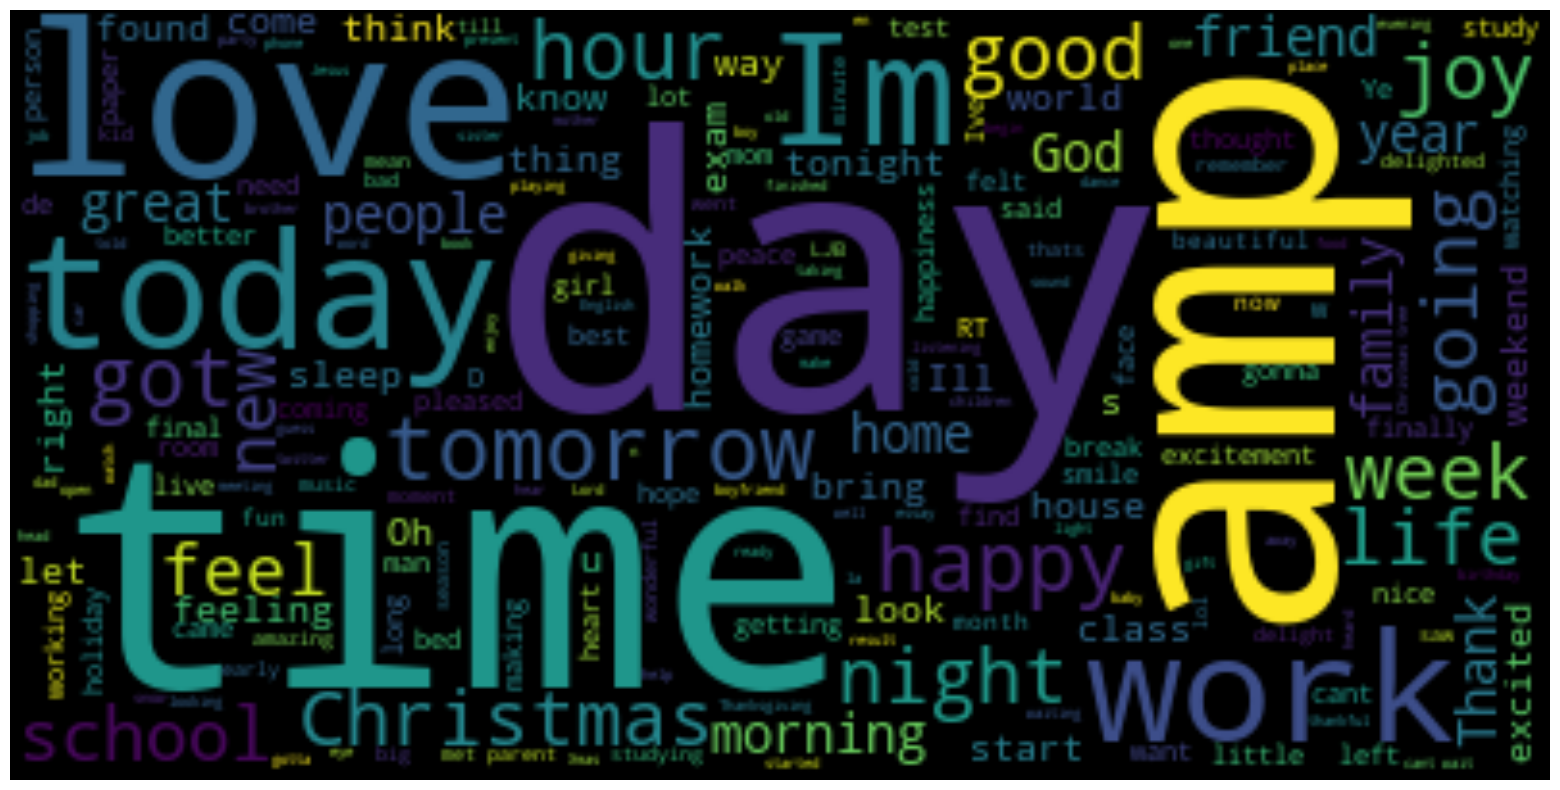

In [92]:
plot_wordcloud(joy_docx)

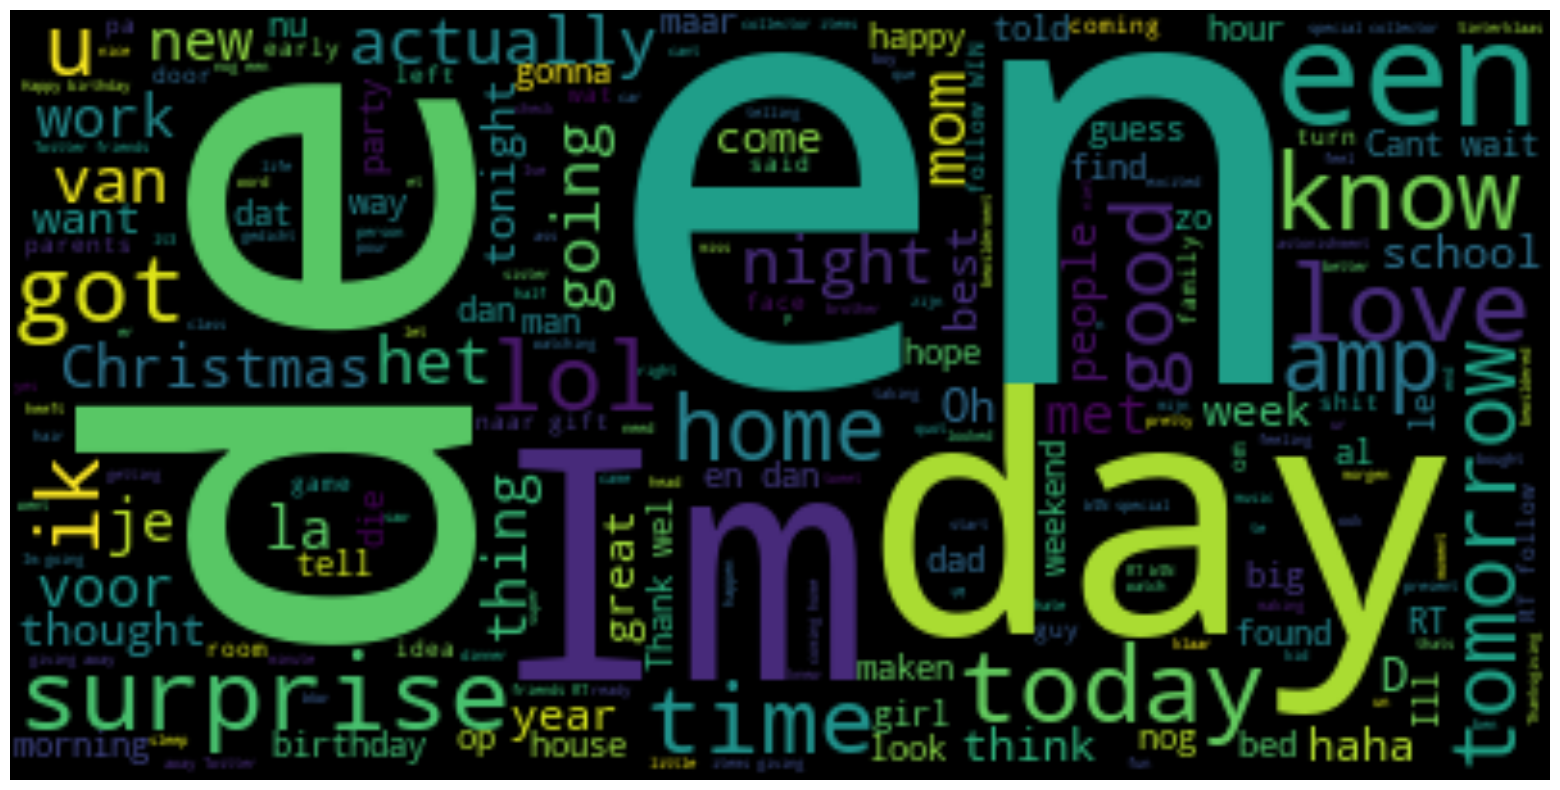

In [93]:
plot_wordcloud(surprise_docx)

### Machine Learning 
+ Naive Bayes
+ Logistic Regression
+ kNN
+ DecisionTree

#### Compare with SparkNLP / NLU John Snows Lab

In [97]:
# Load Machine Learning Packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorization 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [98]:
# Split our dataset!
# We can use pandas to split or train_test_split from sklear.model_selection
from sklearn.model_selection import train_test_split

### Build features from our text
We need to build features from text for our Machine learning algorithms
<p> But to do this we need to use vectorization.
<p> Vectorization is jargon for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support.
<p> In Machine Learning, vectorization is a step in feature extraction. The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

In [99]:
x_features = ds['Clean_Text']
y_labels = ds['Emotion']

In [102]:
x_features

0                                                      NaN
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [113]:
# I was receiving an error -> np.nan is an invalid document, expected byte or unicode string   when trying to use CountVectorizer.
# I assume this is terrible practice as I am 'modifying' the data but in order to proceed I changed the Nan values in my dataset to a string. 
# I'm not sure why the Nan values came about in the first place when cleaning the data. A text "Why?" turned into Nan which I don't understand how that works.
ds=ds.fillna("n/a")

#Actually after some researching on the error I fixed the issue with ->  cv.fit_transform(x_features.values.astype(str))

In [121]:
# Vectorizer

#x = v.fit_transform(df['Review'].values.astype('U'))  ## Even astype(str) would work

cv = CountVectorizer()
x = cv.fit_transform(x_features.values.astype(str))

In [119]:
# Get Features by name
cv.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [124]:
# Split Dataset
x_train, x_test, y_train, y_test = train_test_split(x,y_labels,test_size=0.3,random_state=42)

### Build our model!


In [125]:
#Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(x_train,y_train)

MultinomialNB()

In [126]:
# Accuracy
# Method 1
nb_model.score(x_test, y_test)

0.5778884843839817

In [128]:
# Predictions
y_pred_for_nb = nb_model.predict(x_test)
y_pred_for_nb

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

### Make a single prediction
+ Vectorized our test
+ Applied our model

In [129]:
sample_test = ["I love food so much"]


In [130]:
vect = cv.transform(sample_test).toarray()

In [134]:
# Make prediction
nb_model.predict(vect)

array(['joy'], dtype='<U8')

In [136]:
# Check percentage for the prediction probability! How accurate is our prediction (confidence score)?
nb_model.predict_proba(vect)

array([[9.30966568e-03, 1.82582121e-04, 4.06939700e-02, 6.68402637e-01,
        6.71034329e-05, 2.75569581e-01, 9.85635530e-08, 5.77436190e-03]])

In [137]:
# Get all our classes for our model
nb_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [138]:
# Model says 66.8% sure it is joy.
np.max(nb_model.predict_proba(vect))

0.6684026371322512

In [143]:
def predict_emotion(text, model):
    new_vector = cv.transform(text).toarray()
    prediction = model.predict(new_vector)
    prediction_probability = model.predict_proba(new_vector)
    prediction_percentage_for_all = dict(zip(model.classes_, prediction_probability[0]))
    print("Prediction:{}, Prediction Score:{}".format(prediction[0], np.max(prediction_probability)))
    return prediction_percentage_for_all

In [144]:
predict_emotion(sample_test, nb_model)

Prediction:joy, Prediction Score:0.6684026371322512


{'anger': 0.009309665676216237,
 'disgust': 0.00018258212064456385,
 'fear': 0.040693970038977664,
 'joy': 0.6684026371322512,
 'neutral': 6.71034328959788e-05,
 'sadness': 0.27556958113894325,
 'shame': 9.856355297864822e-08,
 'surprise': 0.005774361896519229}

In [145]:
predict_emotion(["I hate when it rains while driving"], nb_model)

Prediction:fear, Prediction Score:0.38503352464603335


{'anger': 0.3678433097440057,
 'disgust': 0.00015511175309471605,
 'fear': 0.38503352464603335,
 'joy': 0.12061152508745093,
 'neutral': 7.446497632690323e-06,
 'sadness': 0.11690974414988331,
 'shame': 3.4062780084074544e-07,
 'surprise': 0.009438997494097526}

#### Model Evaluation

In [146]:
# Classification Report
print(classification_report(y_test, y_pred_for_nb))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.52      0.86      0.65      3311
     neutral       0.80      0.23      0.36       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.58     10438
   macro avg       0.68      0.38      0.41     10438
weighted avg       0.61      0.58      0.55     10438



In [153]:
# Confusion 
confusion_matrix(y_test, y_pred_for_nb)


array([[ 633,    0,   58,  367,   13,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  351,    5,  161,    0,   63],
       [  76,    1,  100, 2847,   10,  204,    0,   73],
       [  20,    0,   17,  407,  157,   71,    0,    3],
       [  90,    1,   74,  726,    6, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]], dtype=int64)

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


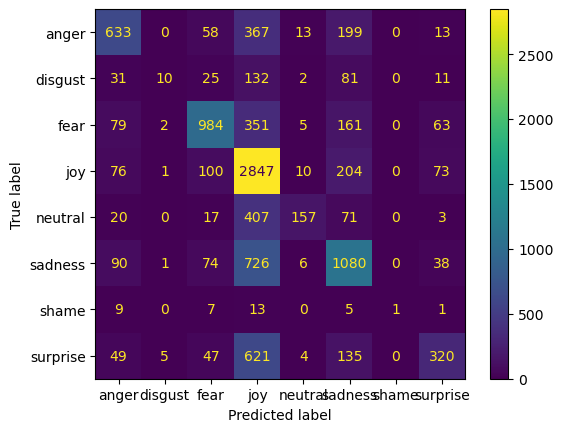

In [154]:
# Plot confusion_matrix
plot_confusion_matrix(nb_model, x_test, y_test)
plt.show()

### Save Model

In [156]:
import joblib

In [157]:
model_file = open("emotion_classifer_nb_model_2022_December_06.pkl", "wb")
joblib.dump(nb_model, model_file)
model_file.close()

### Model Interpretation
+ Eli5
+ Lime 
+ Shap
<p> Note when you use Naive Bayes you can't use Eli5<p>

In [158]:
# LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [159]:
# Accuracy
lr_model.score(x_test, y_test)

0.6209043878137575

In [161]:
# Single Prediction
predict_emotion(sample_test, lr_model)

Prediction:joy, Prediction Score:0.5556314246190288


{'anger': 0.050273571362143506,
 'disgust': 0.022305627329190884,
 'fear': 0.04363314641434284,
 'joy': 0.5556314246190288,
 'neutral': 0.01350875125251855,
 'sadness': 0.2693157536026329,
 'shame': 0.0009730544261663702,
 'surprise': 0.044358670993976126}

In [163]:
# Interpret Model
import eli5

In [164]:
# Show the weights for each class/label
eli5.show_weights(lr_model, top=20)

In [168]:
class_names = y_labels.unique().tolist()

In [170]:
feature_names = cv.get_feature_names()

In [173]:
eli5.show_weights(lr_model, feature_names=feature_names, target_names = class_names)